In [1]:
import pandas as pd
pd.options.plotting.backend = "plotly"
import os
import matplotlib.pyplot as plt
import numpy as np

from my_data_functions import concat_data, clean_data, get_vgs_vector, get_labels

In [2]:
def get_multiline_plot(file_name):
    df = concat_data(clean_data(file_name), "no_sensor")
        
    df_num = df.drop("label", axis=1)

    num_cat = len(df.label.unique())
    vgs = get_vgs_vector(file_name)
    cat = get_labels(file_name)
    cmap = plt.cm.jet  # Change to 'plasma', 'coolwarm', etc. for different palettes
    colors = [cmap(i) for i in np.linspace(0, 1, num_cat)]

    fig = plt.figure(figsize=(10, 20))
    ax = fig.add_subplot(111, projection='3d')

    for idx, cat_ in enumerate(cat):
        y = np.full_like(vgs, num_cat - idx)
        df_ = df[df.label == idx].drop("label", axis=1)

        for row in range(10):
            z = df_.iloc[row].to_numpy()
            # Only label the first plotted line per category to avoid duplicate legend entries.
            label = cat_ if row == 0 else None
            ax.plot(vgs, y, z, color=colors[idx], label=label, alpha=0.8)

    ax.set_xlabel(r'$V_{GS}$ (V)', labelpad=20)
    plt.setp(ax.get_xticklabels(), rotation=45)
    ax.set_ylabel('Categoria')
    ax.tick_params(axis='y', pad=25)
    
    ax.set_zlabel(r'$I_{DS}$ (A)',labelpad=10)
    ax.set_yticklabels([])

    # Position the legend outside of the plot area and add a title for the categories
    leg = plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
    leg.set_title("Categoria")
    
    plt.tight_layout()
    plt.show()


# Main

In [3]:
os.chdir(r"C:\Users\diogo\Desktop\new_tese_after_git\clean_code\chemosensing\original_data\mat_data_files")


C:\Users\diogo\AppData\Local\Temp\ipykernel_35960\1252027953.py:37: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


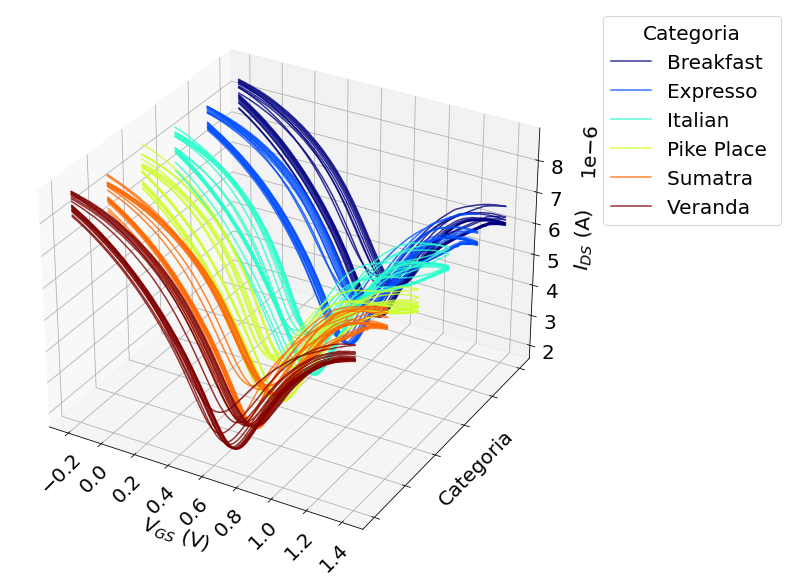

C:\Users\diogo\AppData\Local\Temp\ipykernel_35960\1252027953.py:37: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


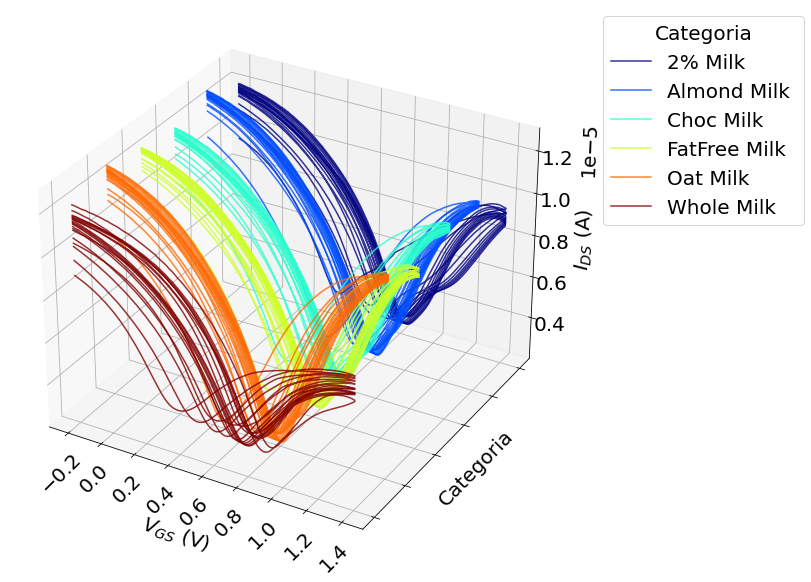

C:\Users\diogo\AppData\Local\Temp\ipykernel_35960\1252027953.py:37: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


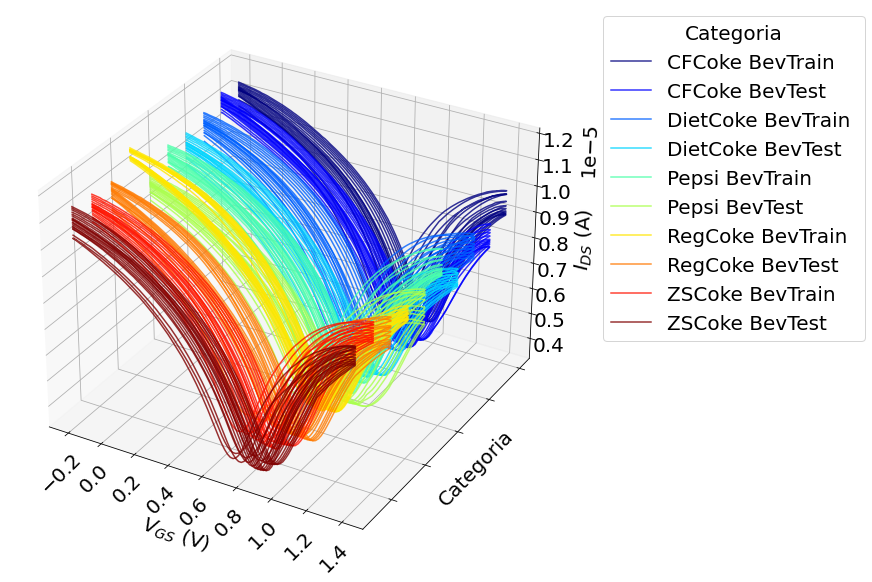

C:\Users\diogo\AppData\Local\Temp\ipykernel_35960\1252027953.py:37: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


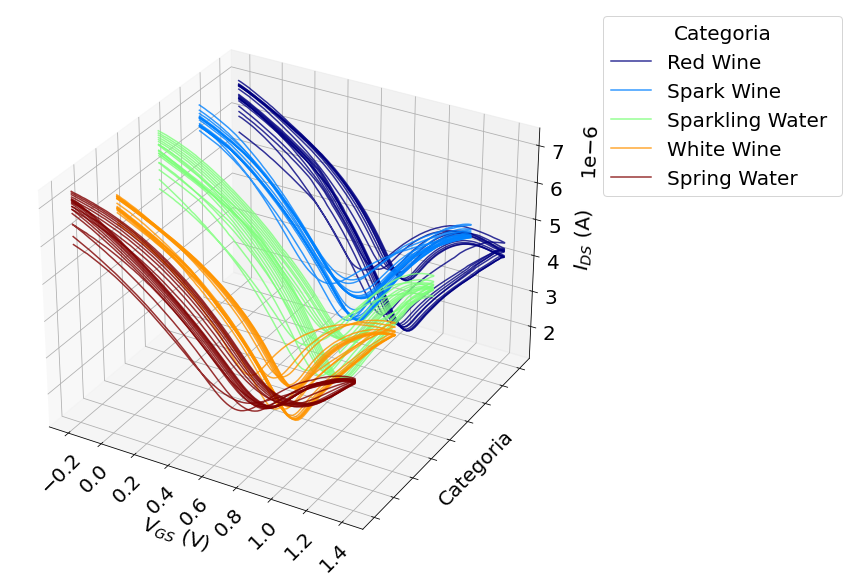

In [ ]:

from matplotlib import rcParams

# Set font globally
rcParams['font.size'] = 20  # Change font size

data_names =  ["coffee","milk", "soda","wine"]

for data in data_names:
    get_multiline_plot(data+"_data.mat")